In [1]:
from automata_rules import automata_output_list
from cana.boolean_node import BooleanNode
from cana.drawing.schema_vis import plot_schemata, plot_anni_gen_schemata
# from schema_search_tools import annihilation_generation_rules
from cana.utils import fill_out_lut
import schematodes as sc
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Rectangle, RegularPolygon
from matplotlib.text import Text
import numpy as np
import copy

In [2]:
rule='GP'
node = BooleanNode.from_output_list(automata_output_list[rule])
node._check_compute_canalization_variables(ts_coverage=True)
anni_gen = node.get_annihilation_generation_rules()
print(f"Input symmetry: {node.input_symmetry()}")
print(f"Input symmetry mean: {node.input_symmetry_mean()}")


Input symmetry: 1.7083333333333335
Input symmetry mean: 1.7083333333333337


# code: input symmetry mean for annihilation and generation rules
refactored into the BooleanNode class

In [3]:
rule='GP'
node = BooleanNode.from_output_list(automata_output_list[rule])
def input_symmetry_mean_anni_gen(node):
    """
    Gets creations/annihilations in the LUT, which includes the creation/annihilation part of the soft creations/annihilations in the ts-schemata.
    """
    node._check_compute_canalization_variables(ts_coverage=True) # computing the ts_coverage if not already computed
    
    anni_gen = node.get_annihilation_generation_rules() # getting the annihilation generation rules for the node
    anni_gen_coverage = [] # dict to store the rules covered in anni_gen
    for key, value in fill_out_lut(anni_gen): # expanding anni_gen rules to get the rules covered in LUT
        if value != '?':
            anni_gen_coverage.append(key)

    summand = 0 # summand for the mean of the number of input values that are not # if the rule is covered in two-symbol
    for rule in anni_gen_coverage: # only iterating over the rules that are covered in anni_gen
        inner = 0
        for ts in node._ts_coverage[rule]:
            inner += sum(
                        len(i) for i in ts[1]
                    )
        summand += inner / len(node._ts_coverage[rule])
    print(f"Summand: {summand}")
    print(f"Total coverage in LUT: {len(anni_gen_coverage)}")

    return summand/len(anni_gen_coverage) # returning the mean of the number of input values that are not # for all anni_gen rules

print(f"Input symmetry mean anni_gen: {input_symmetry_mean_anni_gen(node)}")
print(node.schemata_look_up_table())
print(node.get_annihilation_generation_rules())
lut = node.look_up_table()
generation_outputs = (  # generates an LUT which is NOT RULE & (X_4), where X_4 is the middle input. the result is 1 for all the rules that generate and 0 for all the others.
        ((lut["Out:"] == "1") & (lut["In:"].str[3] == "0")).apply(lambda x: "1" if x else "0").tolist()
    )
generation = BooleanNode.from_output_list(generation_outputs)
print(generation.schemata_look_up_table())
# node._ts_coverage

Summand: 98.66666666666666
Total coverage in LUT: 56
Input symmetry mean anni_gen: 1.7619047619047616
     Input  Output
0  0##10##       0
1  0#0#0##       0
2  0#####0       0
3  0#01###       0
4  ###0##0       0
5  ##1#1#1       1
6  1#####1       1
7  1##1###       1
8  ###01#1       1
9  ##10##1       1
[['0##1##0', 0], ['0##10##', 0], ['0#01###', 0], ['###01#1', 1], ['1##0##1', 1], ['##10##1', 1]]
     Input  Output
0  ######0       0
1  ###1###       0
2  0#0#0##       0
3  ###01#1       1
4  1##0##1       1
5  ##10##1       1


In [4]:
# for rule in automata_output_list:
#     node = BooleanNode.from_output_list(automata_output_list[rule])
    # print(f"Rule: {rule}\nInput symmetry: {node.input_symmetry()}")
    # print(f"Input symmetry mean: {node.input_symmetry_mean()}")
    # print(f"Input symmetry mean anni_gen: {node.input_symmetry_mean_anni_gen()}\n")


# $K_e, K_r$ for anni_gen

In [5]:
for rule in automata_output_list:
    node = BooleanNode.from_output_list(automata_output_list[rule])
    rule_kr = node.input_redundancy(norm = False)
    k_r = node.input_redundancy_anni_gen()
    # rule_ke = node.effective_connectivity(norm=False)
    # ke = node.effective_connectivity_anni_gen()
    # print(f"Rule: {rule}\nAnni_Gen K_r: {k_r}\nK_r: {rule_kr}\nAnni_Gen K_e: {ke}\nK_e: {rule_ke}\n") 
    print(f"Rule: {rule}\nAnni_Gen K_r: {k_r}\nK_r: {rule_kr}\n")

Rule: GKL
Anni_Gen K_r: 4.0
K_r: 4.65625

Rule: GP
Anni_Gen K_r: 4.0
K_r: 4.619791666666666

Rule: GEP_1
Anni_Gen K_r: 4.0
K_r: 4.268229166666666

Rule: GEP_2
Anni_Gen K_r: 4.0
K_r: 4.268229166666666

Rule: Das
Anni_Gen K_r: 3.8706896551724137
K_r: 4.138504464285714

Rule: Davis
Anni_Gen K_r: 2.8636363636363638
K_r: 3.64296875

Rule: DMC
Anni_Gen K_r: 2.3236842105263156
K_r: 2.813368337391775

Rule: COE_1
Anni_Gen K_r: 2.2649717514124292
K_r: 2.4683283730158734

Rule: COE_2
Anni_Gen K_r: 2.8631720430107523
K_r: 2.96691158234127

Rule: MM401
Anni_Gen K_r: 4.0
K_r: 4.244122023809524

Rule: MM802
Anni_Gen K_r: 2.7881720430107526
K_r: 2.9411086309523813

Rule: F_WO_1
Anni_Gen K_r: 2.335057471264368
K_r: 2.5259796626984126

Rule: F_WO_2
Anni_Gen K_r: 2.335057471264368
K_r: 2.525979662698413

Rule: F_WO_3
Anni_Gen K_r: 2.391975308641975
K_r: 2.678050595238095

Rule: F_WO_4
Anni_Gen K_r: 2.3919753086419755
K_r: 2.678050595238095

Rule: F_WO_5
Anni_Gen K_r: 2.441358024691358
K_r: 2.78459821428

# two symbol for annihilation and generation rules 

In [1]:
# TODO: [SRI] CREATE an annihilation and generation plot like plot schemata.
# TODO: [SRI] FIND TWO SYMBOLS COMPRESSED FORM FOR ANNIHILATION AND GENERATION RULES

Annigen_symetry : 1.7619047619047616


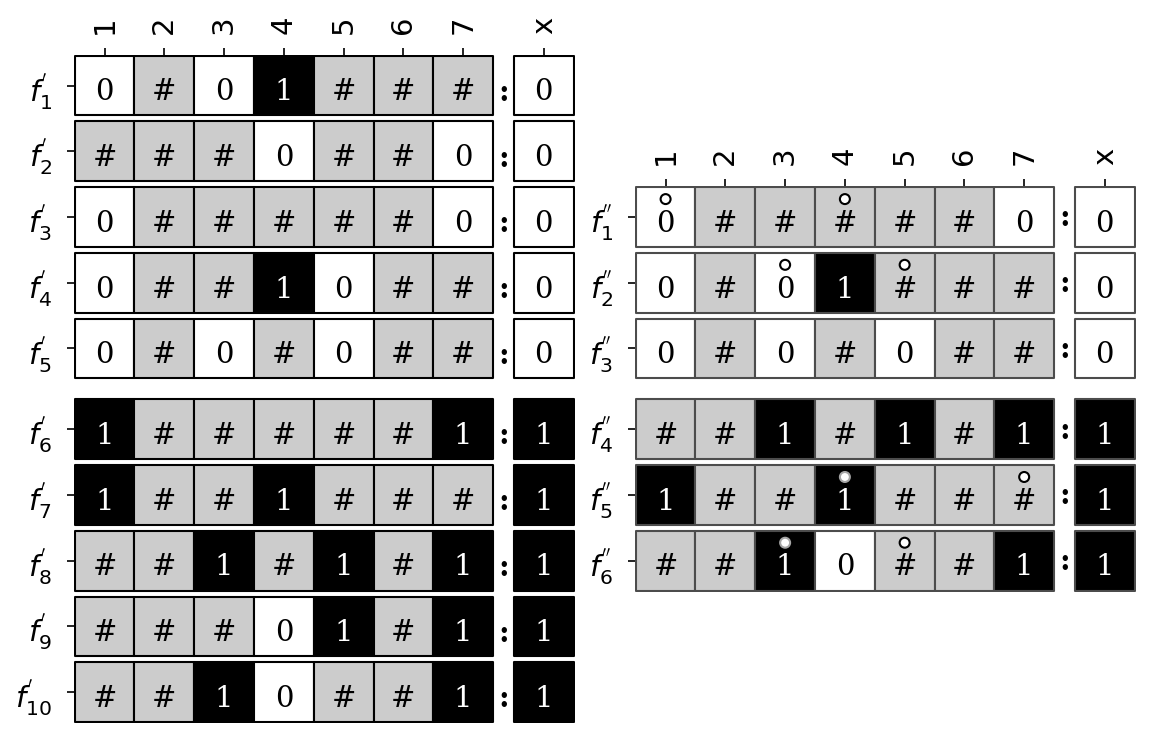

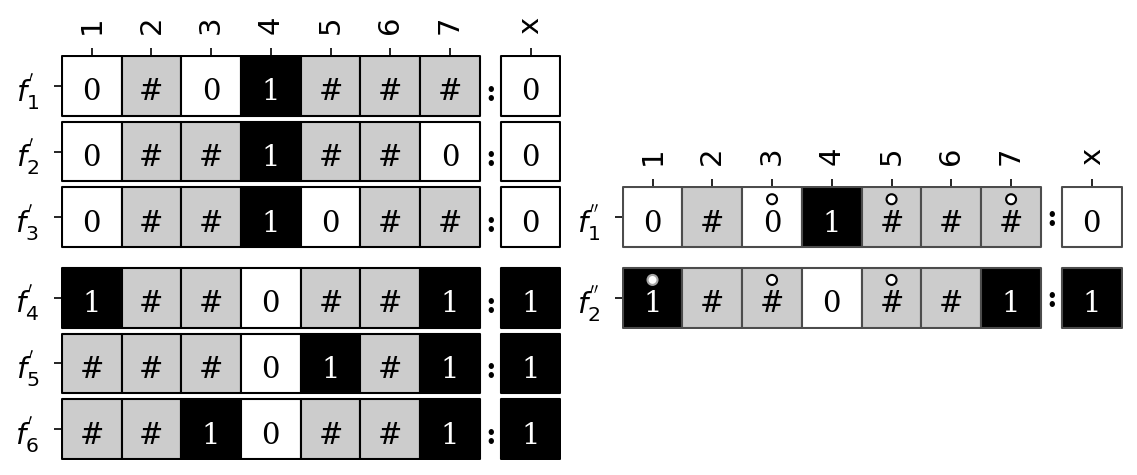

In [2]:
name = 'GP'
node = BooleanNode.from_output_list(automata_output_list[name])
annigen_symmetry = node.input_symmetry_mean_anni_gen()
print(f"Annigen_symetry : {annigen_symmetry}")
plot_schemata(node)
plot_anni_gen_schemata(node)
